In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nb_general as nb
import scipy.linalg as la

In [2]:
G = nx.Graph([[1,2],[2,3],[3,4],[4,5],[5,2],[5,6],[6,7]])

In [3]:
D = np.diag(list(dict(G.degree()).values()))

In [4]:
D_inv = la.inv(D)

In [5]:
D_inv = np.diag([0,1/2,1,1,1/2,1,0])

In [6]:
alpha=.7

In [7]:
S, T = nb.create_s_t(G)
C, B = nb.to_edge_space(G, B= True, graph=False)
D = np.diag(B.sum(axis=1))
D_inv = np.diag([1/2,0,1,1/2,1/2,1,1,1/2,1,1/2,1,1/2,0,1])

In [8]:
TT_inv = la.solve(T@T.T,np.eye(T.shape[0]))

# Make equation to solve
lhs = np.eye(B.shape[0])-alpha*B.T@D_inv
rhs = (1-alpha)/len(G.nodes)*T.T@TT_inv@np.ones(T.T.shape[1])

pr_vec = T@la.solve(lhs,rhs)

In [9]:
pr_vec

array([0.04285714, 0.15278533, 0.1159043 , 0.11633995, 0.15622282,
       0.10993513, 0.04285714])

In [10]:
(1-alpha)/7

0.042857142857142864

In [11]:
A = nx.adjacency_matrix(G).todense()

In [12]:
B[1,:] = T.T@TT_inv@np.ones(TT_inv.shape[0])
B[-2,:] = T.T@TT_inv@np.ones(TT_inv.shape[0])

In [13]:
D_hat_inv = la.inv(np.diag(B.sum(axis=1)))

In [14]:
lhs = np.eye(B.shape[0])-alpha*B.T@D_hat_inv
rhs = (1-alpha)/len(G.nodes)*T.T@TT_inv@np.ones(T.T.shape[1])

pr_vec = T@la.solve(lhs,rhs)

In [15]:
pr_vec

array([0.05815855, 0.20733472, 0.15728595, 0.15787714, 0.2119995 ,
       0.14918559, 0.05815855])

In [16]:
la.solve(lhs,rhs)

array([0.05815855, 0.07361878, 0.06503568, 0.06868027, 0.0826817 ,
       0.07460425, 0.07657489, 0.08130225, 0.06785087, 0.07226856,
       0.07188007, 0.06979026, 0.07939532, 0.05815855])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


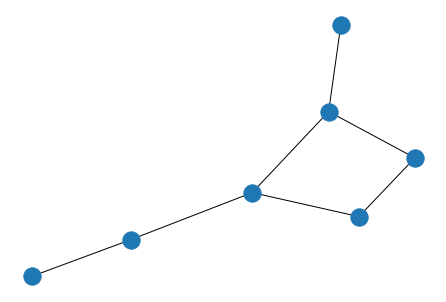

In [17]:
nx.draw(G)

In [21]:
x=np.array([1,2,3,4,5])
np.ones(5).reshape(5,1)@x.reshape(1,5)

array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])